## Clean and Analyze Employee Exit Surveys

This is the data cleaning and analysis project. I'm going to work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

I'll play the role of data analyst and pretend my stakeholders want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Introduction

First, we'll read in the datasets and do some initial exporation.

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_columns = 150 # to avoid truncated output 

#Read in the data
dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")

In [3]:
#Quick exploration of the data
dete_survey.info()
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

dete: 822 rows,56 columns.
tafe: 702 rows,72 columns.

In [4]:
print(dete_survey.head(3))

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   

  Role Start Date         Position Classification          Region  \
0            2004   Public Servant        A01-A04  Central Office   
1      Not Stated   Public Servant        AO5-AO7  Central Office   
2            2011  Schools Officer            NaN  Central Office   

                       Business Unit    Employment Status  \
0  Corporate Strategy and Peformance  Permanent Full-time   
1  Corporate Strategy and Peformance  Permanent Full-time   
2               Education Queensland  Permanent Full-time   

   Career move to public sector  Career move to private sector  \
0                          True                          False   
1                         False                          False   

In [5]:
print(tafe_survey.head(3))

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    

  Co

In [6]:
dete_null=dete_survey.isnull().sum()
print(dete_null)

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
tafe_null=tafe_survey.isnull().sum()
print(tafe_null)

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

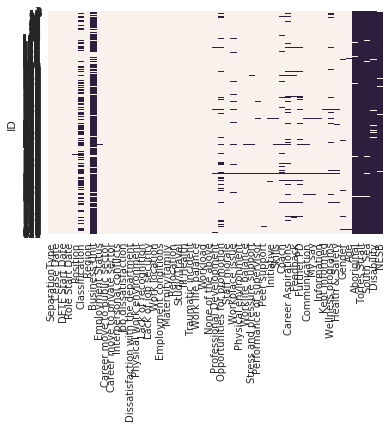

In [9]:
f, ax = plt.subplots()
ax=sns.heatmap(dete_survey.set_index("ID").isnull(), cbar=False)
plt.show()

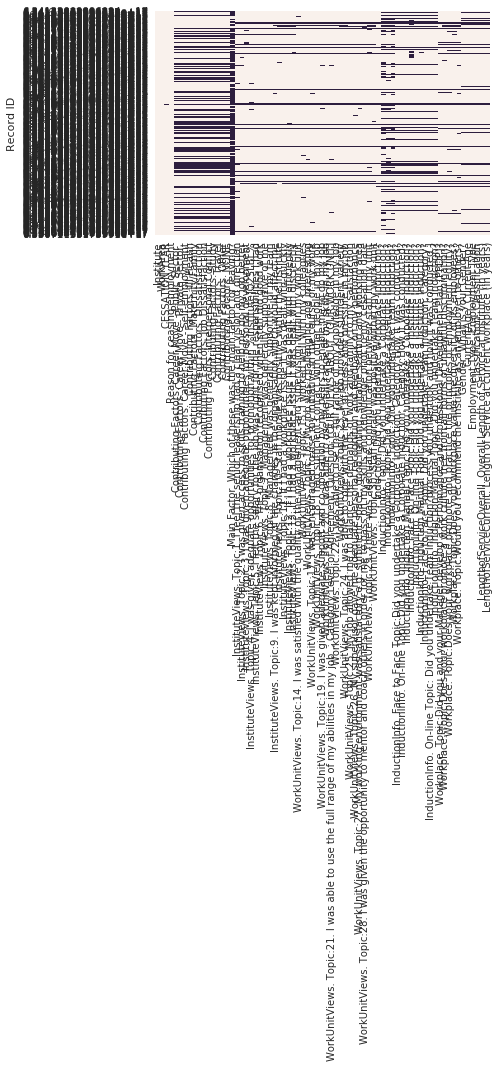

In [10]:
f, ax = plt.subplots()
ax=sns.heatmap(tafe_survey.set_index("Record ID").isnull(), cbar=False)
plt.show()

I can first make the following observations:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

dete: columns with too many missing values:
- Business Unit;
- Aboriginal;
- Torres Strait;
- South Sea;
- Disability;
- NESB.

tafe: columns with too many missing values:
- Main Factor.

## Identify Missing Values and Drop Unneccessary Columns

First, I'll correct the "Not Stated" values and drop some of the columns we don't need for our analysis.

In [11]:
dete_survey=pd.read_csv("dete_survey.csv",na_values="Not Stated")

In [12]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [13]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[28:49],axis=1)

In [14]:
dete_survey_updated.info()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

I removed the useless columns from the dataframes

In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


## Clean Column Names

Next, I'll standardize the names of the columns I want to work with, in order to prepare the dataframes to be compared and merged

In [16]:
rename_columns={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated.rename(columns=rename_columns,inplace=True)


In [17]:
print(dete_survey_updated.head(1))
print(tafe_survey_updated.head(1))

   id         separationtype cease_date  dete_start_date  role_start_date  \
0   1  Ill Health Retirement    08/2012           1984.0           2004.0   

         position classification          region  \
0  Public Servant        A01-A04  Central Office   

                       business_unit    employment_status  \
0  Corporate Strategy and Peformance  Permanent Full-time   

   career_move_to_public_sector  career_move_to_private_sector  \
0                          True                          False   

   interpersonal_conflicts  job_dissatisfaction  \
0                    False                 True   

   dissatisfaction_with_the_department  physical_work_environment  \
0                                False                      False   

   lack_of_recognition  lack_of_job_security  work_location  \
0                 True                 False          False   

   employment_conditions  maternity/family  relocation  study/travel  \
0                  False             False 

## Filter the data

In this project I have to focus on survey respondents who resigned, so we'll only select separation types containing the string 'Resignation'.

In [18]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [20]:
dete_resignation=dete_survey_updated.copy()
dete_resignation=dete_resignation[dete_resignation["separationtype"].str.contains("Resignation")]

In [21]:
print(dete_resignation)

      id                        separationtype cease_date  dete_start_date  \
3      4             Resignation-Other reasons    05/2012           2005.0   
5      6             Resignation-Other reasons    05/2012           1994.0   
8      9             Resignation-Other reasons    07/2012           2009.0   
9     10            Resignation-Other employer       2012           1997.0   
11    12  Resignation-Move overseas/interstate       2012           2009.0   
12    13             Resignation-Other reasons       2012           1998.0   
14    15            Resignation-Other employer       2012           2007.0   
16    17             Resignation-Other reasons       2012              NaN   
20    21            Resignation-Other employer       2012           1982.0   
21    22             Resignation-Other reasons       2012           1980.0   
22    23             Resignation-Other reasons       2012           1997.0   
23    24             Resignation-Other reasons       2012       

In [22]:
tafe_resignation=tafe_survey_updated.copy()
tafe_resignation=tafe_resignation[tafe_resignation["separationtype"]=="Resignation"]
tafe_resignation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 51 columns):
id                                                                                                                 340 non-null float64
Institute                                                                                                          340 non-null object
WorkArea                                                                                                           340 non-null object
cease_date                                                                                                         335 non-null float64
separationtype                                                                                                     340 non-null object
Contributing Factors. Career Move - Public Sector                                                                  332 non-null object
Contributing Factors. Career Move - Private Sector                                 

In order to understand if employees who have only worked for the institutes for a short period of time are resigning due to some kind of dissatisfaction and the reasons employees who have been at the job longer have resigned I made a copy of the dataframes with just the rows corresponding to resigned employees. 

## Verify the Data

I'll focus now on verifying that the years in the cease_date and dete_start_date columns make sense.

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [23]:
print(dete_resignation["cease_date"].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64


In [24]:
pattern = r"([1-2][0-9]{3})"
cease_years_dete=dete_resignation["cease_date"].str.extract(pattern,expand=False)
cease_years_dete=cease_years_dete.astype(float)
print(cease_years_dete)
print(dete_resignation.loc[[770,774,788,791,797,798],"cease_date"])

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
12     2012.0
14     2012.0
16     2012.0
20     2012.0
21     2012.0
22     2012.0
23     2012.0
25     2012.0
27     2012.0
33     2012.0
34     2012.0
37     2012.0
39     2012.0
40     2012.0
41     2012.0
42     2012.0
43     2012.0
48     2012.0
50     2012.0
51     2012.0
55     2012.0
57     2012.0
61     2012.0
69     2012.0
71     2012.0
        ...  
747    2014.0
751    2013.0
752    2013.0
753    2013.0
755    2013.0
762    2006.0
766    2014.0
769    2013.0
770       NaN
771    2014.0
774       NaN
784    2013.0
786    2014.0
788       NaN
789    2014.0
790    2014.0
791       NaN
794    2013.0
797       NaN
798       NaN
802    2013.0
803    2014.0
804    2014.0
806    2013.0
807    2013.0
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64
770    NaN
774    NaN
788    NaN
791    NaN
797    NaN
798    NaN
Name: cease_date, dtype: object


In [25]:
print(dete_resignation["dete_start_date"].value_counts().sort_index(ascending=True))

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [26]:
print(tafe_resignation["cease_date"].value_counts().sort_index(ascending=True))

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


In [27]:
print(cease_years_dete.value_counts().sort_index(ascending=True))

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64


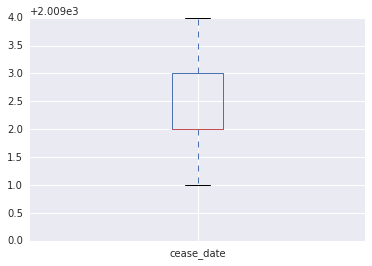

In [28]:
tafe_resignation.boxplot(column=['cease_date'])

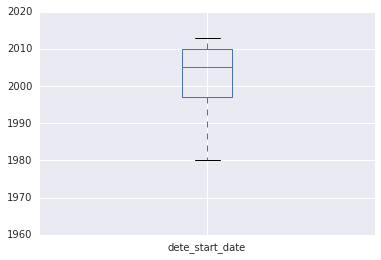

In [29]:
dete_resignation.boxplot(column=['dete_start_date'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f61e3199358>],
 'caps': [<matplotlib.lines.Line2D at 0x7f61e3190630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f61e31816d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f61e3185748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f61e31999b0>,
  <matplotlib.lines.Line2D at 0x7f61e3194ef0>]}

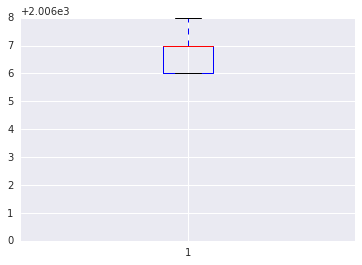

In [30]:
plt.boxplot(cease_years_dete.dropna().values)

In cease_years_dete there are some NaN's. The others years seems reasonable.

## Create the Column "institute_service"

Since the final goal is to answer the question below, I need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.

Below, I calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [31]:
dete_resignation["institute_service"]=cease_years_dete-dete_resignation["dete_start_date"]
print(dete_resignation["institute_service"])

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64


I created a new column in dete_resignation named "institute_service"

## Identify Dissatisfied Employees

I'll identify now any employees who resigned because they were dissatisfied.

Below are the columns I'll use to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
2. dete_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload

If the employee indicated any of the factors above caused them to resign, I'll mark them as dissatisfied in a new column.

In [32]:
print(tafe_resignation["Contributing Factors. Dissatisfaction"].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


In [33]:
print(tafe_resignation["Contributing Factors. Job Dissatisfaction"].value_counts())

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [34]:
print(tafe_resignation["Contributing Factors. Dissatisfaction"])

3                                           -
4                                           -
5                                           -
6                                           -
7                                           -
8                                           -
9                                           -
10                                          -
13                                          -
14     Contributing Factors. Dissatisfaction 
15                                          -
16                                        NaN
17                                          -
18                                        NaN
19                                          -
20     Contributing Factors. Dissatisfaction 
21                                          -
22                                          -
23                                          -
24                                          -
26     Contributing Factors. Dissatisfaction 
27                                

In [35]:
print(tafe_resignation["Contributing Factors. Job Dissatisfaction"])

3                        -
4                        -
5                        -
6                        -
7                        -
8                        -
9                        -
10                       -
13                       -
14     Job Dissatisfaction
15                       -
16                     NaN
17     Job Dissatisfaction
18                     NaN
19                       -
20     Job Dissatisfaction
21                       -
22                       -
23                       -
24                       -
26     Job Dissatisfaction
27                       -
29                       -
32                       -
36                       -
37                       -
39                       -
40                       -
41                       -
42                       -
              ...         
659                      -
660                      -
661    Job Dissatisfaction
665                      -
666                      -
669                      -
6

In [36]:
def update_vals(col):
    if pd.isnull(col):
        return np.nan
    elif col=="-":
        return False
    else:
        return True
columns=['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
dissatisfied_2col=tafe_resignation[columns].applymap(update_vals)
print(dissatisfied_2col)

    Contributing Factors. Dissatisfaction  \
3                                   False   
4                                   False   
5                                   False   
6                                   False   
7                                   False   
8                                   False   
9                                   False   
10                                  False   
13                                  False   
14                                   True   
15                                  False   
16                                    NaN   
17                                  False   
18                                    NaN   
19                                  False   
20                                   True   
21                                  False   
22                                  False   
23                                  False   
24                                  False   
26                                   True   
27        

In [37]:
dissatisfied=dissatisfied_2col.any(axis=1, skipna=False)
print(dissatisfied)

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16       NaN
17      True
18       NaN
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
       ...  
659    False
660    False
661     True
665    False
666    False
669    False
670      NaN
671     True
675     True
676    False
677    False
678    False
679    False
681    False
682    False
683    False
684    False
685     True
686    False
688    False
689     True
690    False
691    False
693    False
694    False
696    False
697    False
698    False
699    False
701    False
Length: 340, dtype: object


In [38]:
tafe_resignation["dissatisfied"]=dissatisfied

In [39]:
columns_dete=["job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment","lack_of_recognition","lack_of_job_security","work_location","employment_conditions","work_life_balance","workload"]
print(dete_resignation[columns_dete])

     job_dissatisfaction  dissatisfaction_with_the_department  \
3                  False                                False   
5                  False                                False   
8                  False                                False   
9                   True                                 True   
11                 False                                False   
12                 False                                False   
14                  True                                 True   
16                 False                                False   
20                 False                                False   
21                 False                                False   
22                 False                                 True   
23                  True                                False   
25                 False                                False   
27                 False                                False   
33                 False 

In [40]:
dissatisfied_dete=dete_resignation[columns_dete].any(axis=1, skipna=False)
dete_resignation["dissatisfied"]=dissatisfied_dete
print(dete_resignation["dissatisfied"])

3      False
5       True
8      False
9       True
11     False
12     False
14      True
16      True
20     False
21     False
22      True
23      True
25      True
27     False
33      True
34      True
37     False
39      True
40     False
41      True
42     False
43      True
48     False
50     False
51     False
55     False
57     False
61     False
69      True
71     False
       ...  
747    False
751     True
752    False
753     True
755    False
762    False
766    False
769    False
770    False
771    False
774    False
784     True
786     True
788    False
789    False
790     True
791     True
794    False
797    False
798    False
802    False
803    False
804    False
806    False
807     True
808    False
815    False
816    False
819     True
821    False
Name: dissatisfied, Length: 311, dtype: bool


In [41]:
dete_resignations_up=dete_resignation.copy()
tafe_resignations_up=tafe_resignation.copy()

I added a new column in both the dataframes called "dissatisfied" that tells us if the employee was dissatisfied by his occupation

## Combine the data

Up to now I've accomplished the following:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now I'm ready to merge the datasets.

In [42]:
dete_resignations_up["institute"]="DETE"
tafe_resignations_up["institute"]="TAFE"
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)
combined_updated=combined.dropna(thresh=500,axis=1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null object
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(1), object(9)
memory usage: 50.9+ KB


Finally I combined the dataframes. I concatenated them vertically and I drop any column with less than 500 non_NaN values. In this format it would be easy to aggregate the data.

## Clean the Service Column

Next, we'll clean the institute_service column and categorize employees according to the following definitions:

- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

The following analysis is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [43]:
print(combined_updated["institute_service"].value_counts())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [44]:
years_of_service=combined_updated["institute_service"].astype("str")
years_extracted=years_of_service.str.extract('(\d+)', expand=False)
print(years_extracted.value_counts())

1     159
3      83
5      56
7      34
11     30
0      20
6      17
20     17
4      16
2      14
9      14
13      8
8       8
15      7
10      6
14      6
17      6
12      6
22      6
18      5
16      5
24      4
23      4
32      3
19      3
39      3
21      3
25      2
26      2
30      2
28      2
36      2
49      1
31      1
38      1
41      1
29      1
33      1
42      1
34      1
35      1
27      1
Name: institute_service, dtype: int64


In [45]:
print(years_extracted)

0        7
1       18
2        3
3       15
4        3
5       14
6        5
7      NaN
8       30
9       32
10      15
11      39
12      17
13       7
14       9
15       6
16       1
17     NaN
18      35
19      38
20       1
21      36
22       3
23       3
24      19
25       4
26       9
27       1
28       6
29       1
      ... 
621      1
622      3
623      5
624    NaN
625    NaN
626      3
627    NaN
628      1
629      1
630      1
631      1
632      3
633      1
634      1
635      1
636      1
637      3
638      1
639      5
640      5
641      1
642    NaN
643      3
644      1
645    NaN
646      5
647      1
648    NaN
649      5
650      3
Name: institute_service, Length: 651, dtype: object


In [46]:
years_extracted_up=years_extracted.astype("float")

In [47]:
def categorize(col):
    if pd.isnull(col):
        return "unknown"
    elif col<3:
        return "new"
    elif 3<=col<=6:
        return "experienced"
    elif 6<col<=10:
        return "established"
    else:
        return "veteran"
service_cat=years_extracted_up.apply(categorize)
print(service_cat.value_counts())
service_cat.describe()

new            193
experienced    172
veteran        136
unknown         88
established     62
Name: institute_service, dtype: int64


count     651
unique      5
top       new
freq      193
Name: institute_service, dtype: object

I categorized the employees according to their years of service

## Perform Initial Analysis

In [48]:
print(combined_updated["dissatisfied"].value_counts(dropna=False))

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


Finally, I'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, I'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [49]:
combined_updated["dissatisfied"].fillna(False)

0      False
1       True
2      False
3       True
4      False
5      False
6       True
7       True
8      False
9      False
10      True
11      True
12      True
13     False
14      True
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
       ...  
621    False
622    False
623     True
624    False
625    False
626    False
627    False
628     True
629     True
630    False
631    False
632    False
633    False
634    False
635    False
636    False
637    False
638     True
639    False
640    False
641     True
642    False
643    False
644    False
645    False
646    False
647    False
648    False
649    False
650    False
Name: dissatisfied, Length: 651, dtype: bool

In [50]:
combined_updated_new=combined_updated.copy()
combined_updated_new["service_cat"]=service_cat

In [51]:
def categorize_bool(col):
    if col:
        return 1
    else:
        return 0
combined_updated_new["dissatisfied_int"]=combined_updated_new["dissatisfied"].apply(categorize_bool)
print(combined_updated_new["dissatisfied_int"].value_counts())
combined_updated_new["dissatisfied_int"].describe()

0    403
1    248
Name: dissatisfied_int, dtype: int64


count    651.000000
mean       0.380952
std        0.485994
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: dissatisfied_int, dtype: float64

In [52]:
combined_agg=combined_updated_new.pivot_table(values='dissatisfied_int', index='service_cat',aggfunc=np.mean)
combined_agg.info()
print(combined_agg)

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, established to veteran
Data columns (total 1 columns):
dissatisfied_int    5 non-null float64
dtypes: float64(1)
memory usage: 80.0+ bytes
             dissatisfied_int
service_cat                  
established          0.516129
experienced          0.343023
new                  0.295337
unknown              0.386364
veteran              0.485294


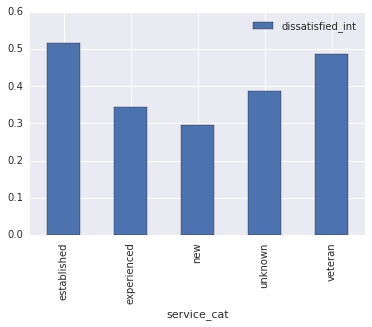

In [53]:
combined_agg.plot(kind="bar")

From the initial analysis above, I can conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, I need to handle the rest of the missing data to finalize our analysis.